# Q. 1) Delivery_time -> Predict delivery time using sorting time

In [1]:
#import dataset
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


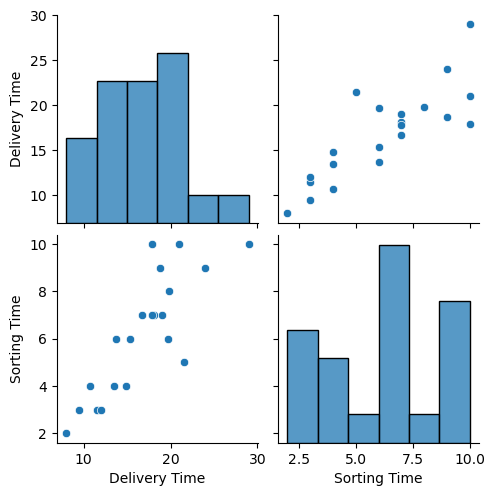

In [3]:
sns.pairplot(df)

In [4]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

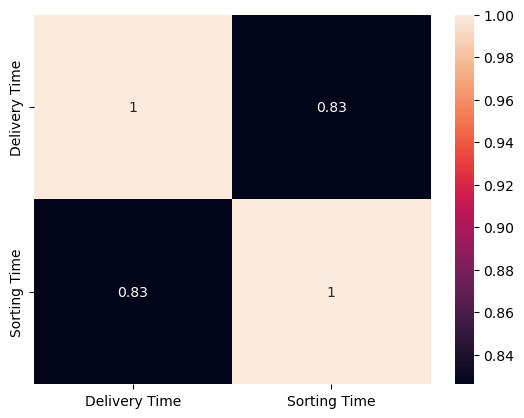

In [5]:
sns.heatmap(df.corr(),annot=True)

C:\Users\Sachin\anaconda3\Anaconda-3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

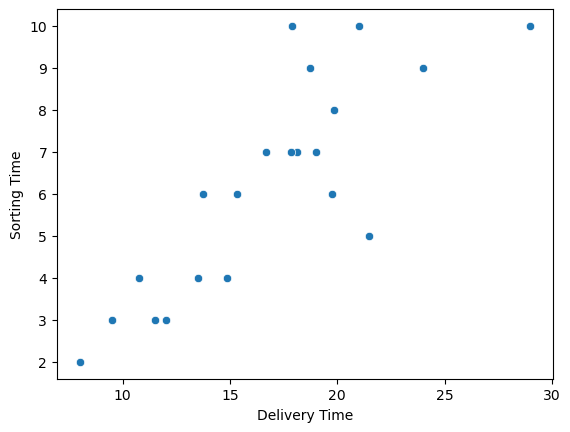

In [6]:
sns.scatterplot(df['Delivery Time'],df['Sorting Time'])

In [7]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

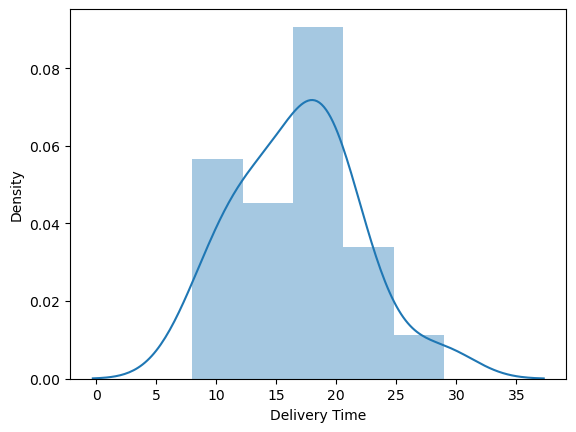

In [8]:
import seaborn as sns
sns.distplot(df["Delivery Time"])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

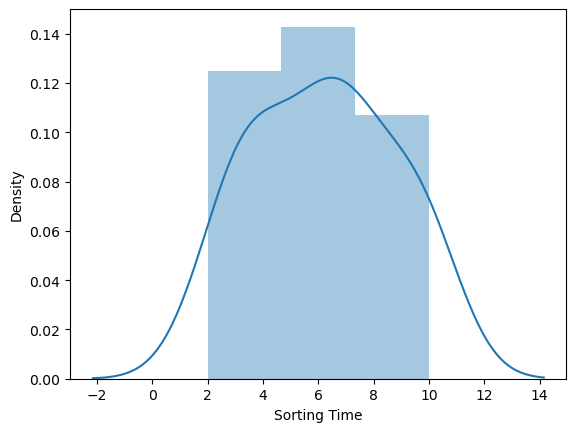

In [9]:
sns.distplot(df["Sorting Time"])

In [10]:
df=df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)

In [11]:
# fitting a linear regression model

# model building

In [12]:
# model building
import statsmodels.formula.api as smf

In [13]:
model=smf.ols('Delivery_Time~Sorting_Time',data=df).fit()


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

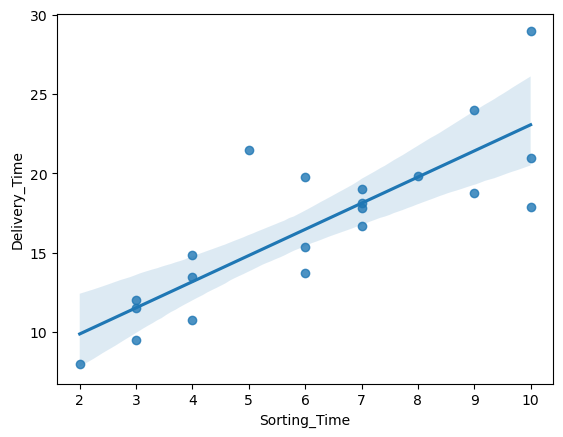

In [14]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=df)

In [15]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [16]:
print(model.pvalues,'\n',model.tvalues)

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64 
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64


In [17]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        18:44:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# using log

In [20]:
model1 = smf.ols("np.log(Delivery_Time)~np.log(Sorting_Time)",data = df).fit()  

In [21]:
model1.params

Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64

In [22]:
print(model1.tvalues,'\n',model1.pvalues)

Intercept               13.085552
np.log(Sorting_Time)     8.024484
dtype: float64 
 Intercept               5.921137e-11
np.log(Sorting_Time)    1.601539e-07
dtype: float64


In [23]:
model1.rsquared,model1.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [24]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):           1.60e-07
Time:                           18:44:50   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Using square

In [26]:
model2=smf.ols("Delivery_Time~np.square(Sorting_Time)",data=df).fit()

In [27]:
model2.params

Intercept                  11.237205
np.square(Sorting_Time)     0.124870
dtype: float64

In [28]:
print(model2.tvalues,'\n',model2.pvalues)

Intercept                  9.398601
np.square(Sorting_Time)    5.691330
dtype: float64 
 Intercept                  1.415704e-08
np.square(Sorting_Time)    1.739194e-05
dtype: float64


In [29]:
model2.rsquared,model2.rsquared_adj

(0.6302871815826637, 0.6108286121922777)

In [30]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.74e-05
Time:                        18:44:50   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(Sorting_Time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Using square root 

In [32]:
model3=smf.ols("Delivery_Time~np.sqrt(Sorting_Time)",data=df).fit()

In [33]:
model3.params

Intercept               -2.518837
np.sqrt(Sorting_Time)    7.936591
dtype: float64

In [34]:
print(model3.tvalues,'\n',model3.pvalues)

Intercept               -0.840911
np.sqrt(Sorting_Time)    6.592434
dtype: float64 
 Intercept                0.410857
np.sqrt(Sorting_Time)    0.000003
dtype: float64


In [35]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        18:44:50   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predict a new data

In [36]:
newdata=pd.Series([20,30,50,35])

newdata =pd.DataFrame(newdata,columns=['Sorting_Time'])

In [37]:
newdata

,Sorting_Time
0,20
1,30
2,50
3,35


In [38]:
model.predict(newdata)

0    39.563132
1    56.053331
2    89.033729
3    64.298430
dtype: float64

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        18:44:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""